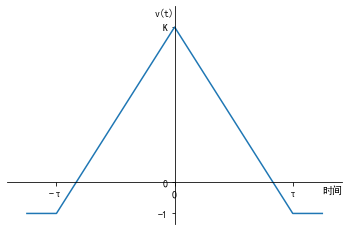

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

x = [-15,-12,0,12,15]
y = [-3,-3,15,-3,-3]
ax.plot(x,y)
ax.set_xticks([-12,0,12])
ax.set_xticklabels(['-τ','0','τ'])
ax.set_yticks([-3,0,15])
ax.set_yticklabels(['-1','0','K'])
ax.set_xlim(-17,17)
ax.set_ylim(-4,17)
ax.annotate('时间',xy=(15,-1))
ax.annotate('v(t)',xy=(-2,16))
plt.show()


**考虑上图所示的平滑后的目标回波电压。假定电阻为1$\Omega$。求由于距离门在间隔$\{0,\tau\}$上横跨而引起的功率损失。**

**解：**  
平滑后的电压表达式为
> when $t\lt 0$

$$v(t)=K+\frac{K+1}{\tau}t\qquad $$

> when $t\ge 0$

$$v(t)=K-\frac{K+1}{\tau}t\qquad $$

由于$P=\frac{U^2}{R}\propto U^2$，且$P_{real}=L_s\cdot P$，故

$$L_s=\frac{U_{real}^2}{U_0^2}=\frac{v^2}{K^2}$$

在间隔$\{0,\tau\}$上时

$$L_s=1-2\frac{K+1}{K\tau}t+(\frac{K+1}{K\tau})^2t^2$$

实际需考虑的时间为$\{-\frac{\tau}{2},\frac{\tau}{2}\}$，由于对称性只需计算正半部分，平均功率损失为

$$\overline L_s=\frac{1}{\frac{\tau}{2}}\int_0^\frac{\tau}{2}(1-2\frac{K+1}{K\tau}t+(\frac{K+1}{K\tau})^2t^2)dt$$

即

$$\overline L_s=\frac{2}{\tau}(t-\frac{K+1}{K\tau}t^2+(\frac{K+1}{K\tau})^2\frac{t^3}{3})\bigg|_0^\frac{\tau}{2}$$

即

$$\overline L_s=1-\frac{K+1}{2K}+\frac{(K+1)^2}{12K^2}$$

In [4]:
def from_dB(v):
    return 10 ** (v / 10)


def to_dB(v):
    return 10 * np.log10(v)

def cal_L_s(K):
    fac = 1 + 1 / K
    return 1-fac/2+fac**2/12
K = 15
L_s = cal_L_s(K)
print('L_s: %.2f dB' % to_dB(L_s))

L_s: -2.51 dB
